# BiomeFUN 
# Ecological Models

This notebook contains the exercises covered in the lecture on Stoichiometric Metabolic Modelling by Timmy Paez Watson. Some lines of code have been removed to be completed during the lecture. For access to the complete notebooks, please go to: https://tp-watson.github.io/Teaching-Site/materials/

## Quantitative description of bacterial growth

### Simple growth model with carrying capacity



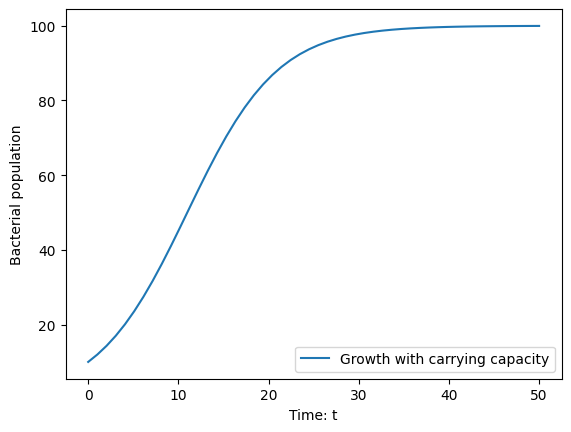

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Differential equation for bacterial growth
def dXdt(X, t):
    dXdt = mu * X * (1 - X/K)
    return dXdt

# Parameters and simulation with solver
mu = 0.2                                  # specific growth rate [1/hour]
K  = 100                                   # Carrying capacity for growth
X0 = 10                                  # initial population (arbitrary units, e.g. mg/L)
t = np.linspace(0, 50,  50)              # time
x = integrate.odeint(dXdt, X0, t)

# Plot the growth of the bacteria
plt.plot(t,x, label = 'Growth with carrying capacity')
plt.legend()
plt.legend(loc='best')
plt.xlabel('Time: t')
plt.ylabel('Bacterial population')
plt.show()

# Consumer–Resource (Batch) - One bacterium


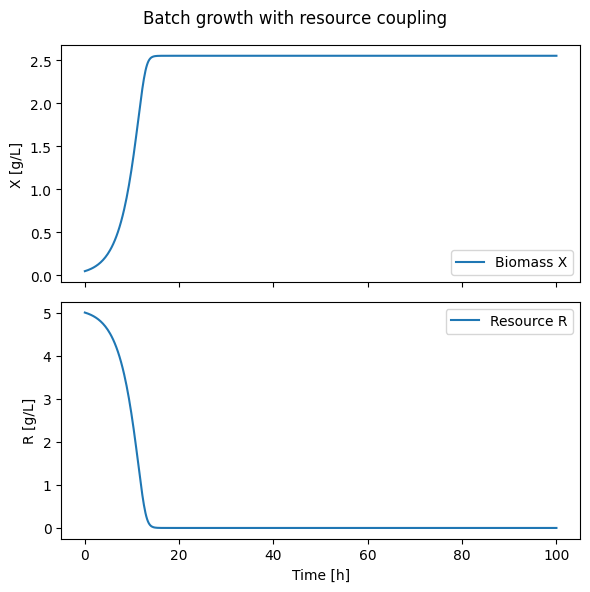

In [3]:
# right-hand side of the batch model
def rhs(XR, t):
    X, R = XR
    mu = mu_max * R / (Ks + R)      # Monod specific growth rate
    # mu = 0.2                      # Uncomment for a constant growth rate
    dXdt = X * mu
    dRdt = -(1.0 / YXR) * dXdt
    return [dXdt, dRdt]

# parameters
mu_max = 0.4     # 1/h, maximum specific growth rate
Ks     = 1.0     # g/L, half-saturation constant
YXR    = 0.5     # gX per gR, biomass yield on resource

# initial conditions
X0 = 0.05        # g/L biomass
R0 = 5.0         # g/L sugar
init = [X0, R0]

# time grid
t = np.linspace(0, 100, 600)

# solve
sol = integrate.odeint(rhs, init, t)
X, R = sol.T

# plots
fig, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True)
ax[0].plot(t, X, label='Biomass X')
ax[0].set_ylabel('X [g/L]')
ax[0].legend(loc='best')

ax[1].plot(t, R, label='Resource R')
ax[1].set_xlabel('Time [h]')
ax[1].set_ylabel('R [g/L]')
ax[1].legend(loc='best')

fig.suptitle('Batch growth with resource coupling')
fig.tight_layout()
plt.show()

# Consumer-Resource (Chemostat) - One bacterium

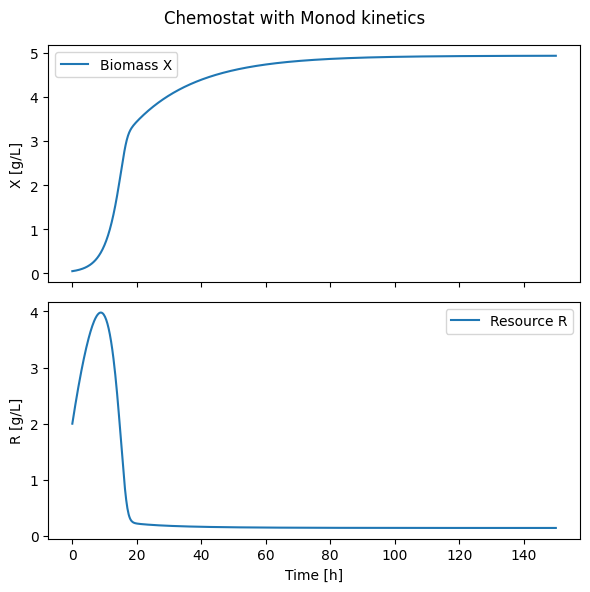

In [5]:
# Start by defining the right hand side of the ODE sysyem
def rhs_chemostat(XR, t):
    X, R = XR
    mu = mu_max * R / (Ks + R)                   # specific growth rate [1/h]
    dXdt = X * (mu - D)                          # growth minus washout
    dRdt = D * (R_in - R) - (1.0/YXR) * mu * X   # feed minus consumption
    return [dXdt, dRdt]

# parameters
mu_max = 0.4    # 1/h
Ks     = 1.0    # g/L
YXR    = 0.5    # gX per gR
D      = 0.05   # 1/h, dilution rate
R_in   = 10.0   # g/L, substrate in the feed

# initial conditions
X0 = 0.05
R0 = 2.0
init = [X0, R0]

# time grid
t = np.linspace(0, 150, 800)

# solve
sol = integrate.odeint(rhs_chemostat, init, t)
X, R = sol.T

# plots
fig, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True)
ax[0].plot(t, X, label='Biomass X')
ax[0].set_ylabel('X [g/L]')
ax[0].legend(loc='best')

ax[1].plot(t, R, label='Resource R')
ax[1].set_xlabel('Time [h]')
ax[1].set_ylabel('R [g/L]')
ax[1].legend(loc='best')

fig.suptitle('Chemostat with Monod kinetics')
fig.tight_layout()
plt.show()

# Consumer–Resource (Chemostat) - Two species
Two speciescompete for one limiting resource in a chemostat. Explore R* and competitive exclusion.

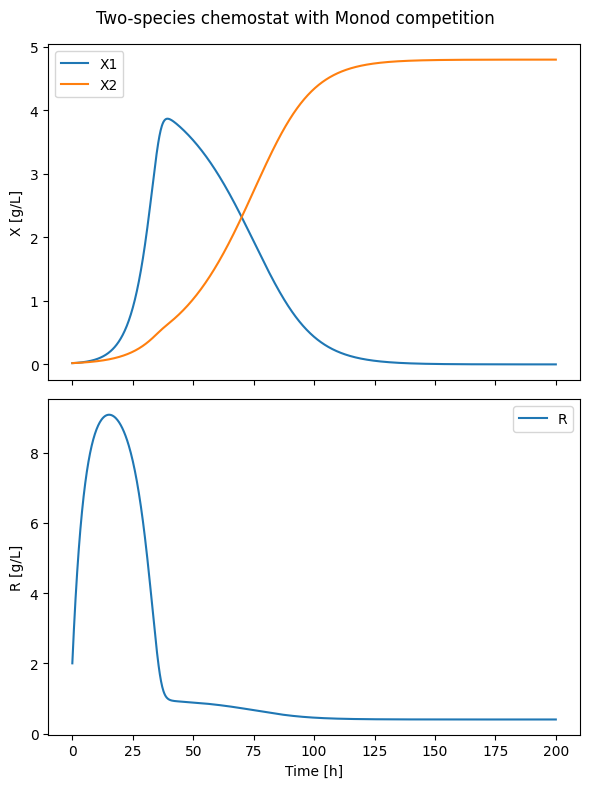

In [16]:
# Start by defining the right hand side of the ODE sysyem
def rhs_chemostat_two_species(XXR, t):
    X1, X2, R = XXR
    # specific growth rates
    mu1 = mu1_max * R / (Ks1 + R)
    mu2 = mu2_max * R / (Ks2 + R)
    # balances
    dX1dt = X1 * (mu1 - D)
    dX2dt = X2 * (mu2 - D)
    dRdt  = D * (R_in - R) - (1.0/Y1R) * mu1 * X1 - (1.0/Y2R) * mu2 * X2
    return [dX1dt, dX2dt, dRdt]

# parameters
mu1_max, Ks1, Y1R = 0.40, 1.0, 0.5    # species 1
mu2_max, Ks2, Y2R = 0.30, 0.2, 0.5    # species 2  (better affinity, lower mu_max)
D      = 0.20                         # 1/h, dilution
R_in   = 10.0                         # g/L, feed substrate

# initial conditions
X1_0, X2_0, R0 = 0.02, 0.02, 2.0
init = [X1_0, X2_0, R0]

# time grid and solve
t = np.linspace(0, 200, 1200)
sol = integrate.odeint(rhs_chemostat_two_species, init, t)
X1, X2, R = sol.T

# plots
fig, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True)
ax[0].plot(t, X1, label='X1')
ax[0].plot(t, X2, label='X2')
ax[0].set_ylabel('X [g/L]')
ax[0].legend(loc='best')

ax[1].plot(t, R,  label='R')
ax[1].set_xlabel('Time [h]')
ax[1].set_ylabel('R [g/L]')
ax[1].legend(loc='best')

fig.suptitle('Two-species chemostat with Monod competition')
fig.tight_layout()
plt.show()

## Exercise B
- Change D and S_in to flip competitive outcomes.
- Sweep Ks and μ_max to map winner regions.
- Bonus: add a second resource and show coexistence via trade-offs.